<h1>8. 지도학습 : 회귀</h1>

## 8.1. 상관분석
### 8.1.1. 상관계수
+ 상관분석(correlation analysis)
  + 두 수치형 변수 간 선형적인 관계(linear relationship)를 파악하는 통계 기법
  + 상관계수(correlation coefficient)
    + 두 변수 간 상관관계를 수치로 나타내어 정량화한 지표
    + 상관계수의 절대값은 선형성의 강도를, 부호는 선형성의 방향성을 나타냄
    + 변수의 측정 단위의 영향을 받지 않음

<br>

+ 상관계수의 성질
  + 상관계수 r은 항상 -1에서 +1 사이의 값을 가짐
  + 절대값이 1에 가까울수록 강한 상관관계를 의미함
  + r>0이면 양의 상관관계, r<0이면 음의 상관관계, r=0이면 상관관계가 없음을 나타냄
    + 양의 상관관계 : 한 변수가 증가할 때 다른 변수도 증가
    + 음의 상관관계 : 한 변수가 증가할 때 다른 변수는 감소
    + 상관관계 없음 : 한 변수가 증가할 때 다른 변수는 영향을 받지 않음

<br>

![](./images/fig3-7.jpg){width=70%}

<br>

### 8.1.2. (실습) 행복지수 데이터 분석
+ \[데이터\] 캐글에서 제공하는 전세계 행복지수 데이터
  + 1인당 GDP, 사회적 지지 정도, 건강한 기대수명, 인생 선택의 자유, 기부
  + \[실습파일\] [2020.csv](./data/2020.csv), [2021.csv](./data/2021.csv)

<br>

> **행복지수와 관련된 요인은 무엇일까?**

<br>

In [1]:
## (1) 데이터 확인 및 전처리

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
df2020 = pd.read_csv('./data/2020.csv', index_col=0)
df2021 = pd.read_csv('./data/2021.csv', index_col=0)

In [4]:
# 열 정보
df2020.dtypes

Country name                     object
Happiness score                 float64
upperwhisker                    float64
lowerwhisker                    float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Dystopia                        float64
dtype: object

In [5]:
# 2020년 데이터 확인
df2020.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.8087,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,2.762835
2,Denmark,7.6456,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,2.432741
3,Switzerland,7.5599,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,2.350267
4,Iceland,7.5045,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,2.460688
5,Norway,7.4880,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,2.168266


In [6]:
# 2021년 데이터 확인
df2021.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.7,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.4,0.919,0.025,2.839
4,Iceland,7.554,7.670,7.438,10.878,0.983,73.0,0.955,0.160,2.967
5,Netherlands,7.464,7.518,7.410,10.932,0.942,72.4,0.913,0.175,2.798


In [7]:
# 데이터 전처리 : 열 삭제
df2020.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis=1, inplace=True)
df2021.drop(['upperwhisker', 'lowerwhisker', 'Dystopia'], axis=1, inplace=True)

In [8]:
# 열 이름 변경 : 공백을 _으로 대체
#df2020.columns = df2020.columns.str.replace(' ','._')
#df2021.columns = df2021.columns.str.replace(' ','_')

In [9]:
# 데이터 전처리 : 열 이름 변경
df2020.columns = ['Country', 'Score', 'GDP_per_capita', 'Social_support', 'Life_expectancy', 'Freedom', 'Generosity']
df2021.columns = ['Country', 'Score', 'GDP_per_capita', 'Social_support', 'Life_expectancy', 'Freedom', 'Generosity']

<br>

In [10]:
## (2) 데이터 분석 및 시각화
## (2-1) 행복 점수와 기능의 상관관계
##       한 국가의 행복지수와 경제적(GDP), 법적 상태(Freedom)는 상관관계가 있는가?

In [11]:
# 2020년 데이터 전처리
df1 = df2020.copy()
df1.drop(['Social_support', 'Life_expectancy', 'Generosity'], axis=1, inplace=True)
df1.head()

,Country,Score,GDP_per_capita,Freedom
Rank,,,,
1,Finland,7.8087,10.639267,0.949172
2,Denmark,7.6456,10.774001,0.951444
3,Switzerland,7.5599,10.979933,0.921337
4,Iceland,7.5045,10.772559,0.948892
5,Norway,7.4880,11.087804,0.955750


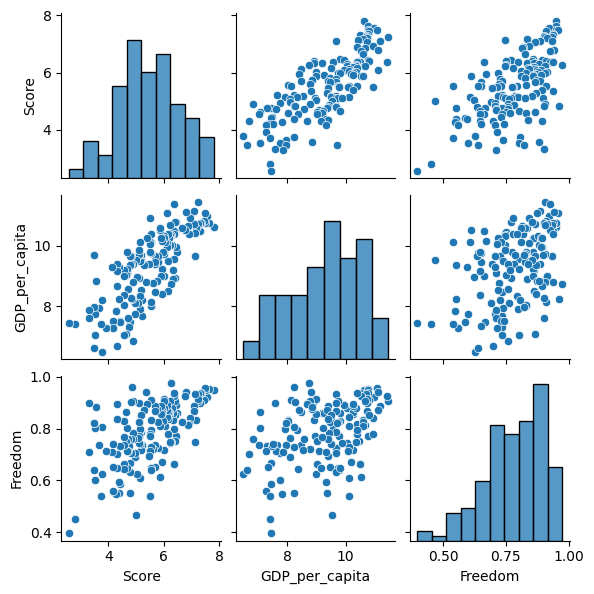

In [12]:
# 산점도 : 2020년 데이터
sns.pairplot(df1, height=2)
plt.show()

In [13]:
# 상관계수 : 2020년 데이터
# 행복지수와 GDP 간 상관계수는 0.78로, 강한 양의 상관관계임
# 행복지수와 Freedom 간 상관계수는 0.59로, 뚜렷한 양의 상관관계임
corr = df1.select_dtypes(include='number').corr()
corr['Score'].sort_values(ascending=False)

Score             1.000000
GDP_per_capita    0.775374
Freedom           0.590597
Name: Score, dtype: float64

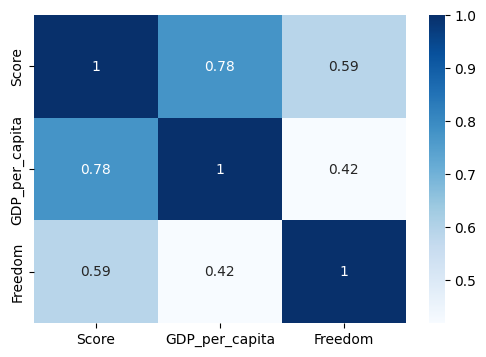

In [14]:
# 상관분석 : 2020년 데이터
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [15]:
# 2021년 데이터 전처리
df2 = df2021.copy()
df2.drop(['Social_support', 'Life_expectancy', 'Generosity'], axis=1, inplace=True)
df2.head()

,Country,Score,GDP_per_capita,Freedom
Rank,,,,
1,Finland,7.842,10.775,0.949
2,Denmark,7.620,10.933,0.946
3,Switzerland,7.571,11.117,0.919
4,Iceland,7.554,10.878,0.955
5,Netherlands,7.464,10.932,0.913


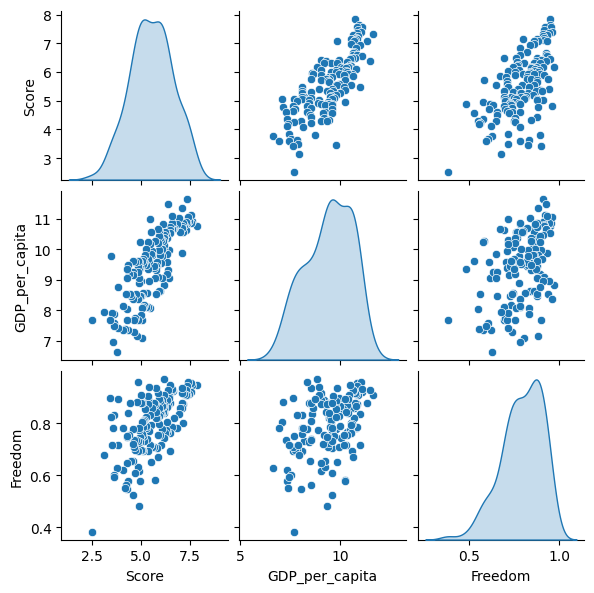

In [16]:
# 산점도 : 2021년 데이터
sns.pairplot(df2, height=2, diag_kind='kde')
plt.show()

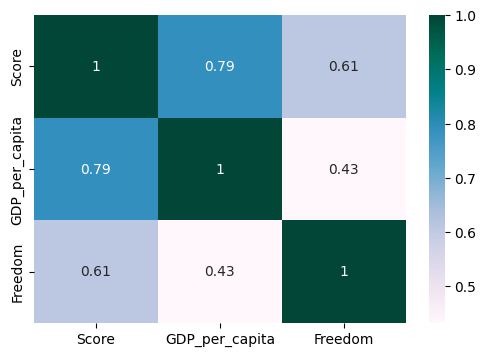

In [17]:
# 상관분석 : 2021년 데이터
# 행복지수와 GDP 간 상관계수는 0.79로, 강한 양의 상관관계임
# 헹복지수와 Freedom 간 상관계수는 0.61로, 뚜렷한 양의 상관관계임
plt.figure(figsize=(6, 4))
sns.heatmap(df2.select_dtypes(include='number').corr(), annot=True, cmap='PuBuGn')
plt.show()

<br>

##### **결과 및 시사점**
+ 행복지수와 GDP 간 관계는?
  + 상관계수는 2020년 0.78, 2021년 0.79로, 강한 양의 상관관계로 나타남
  + 경제 성장은 일반적으로 더 높은 소득과 향상된 생활 수준으로 이어지므로, 국민의 행복 수준도 높아지는 경향이 있음
  + 따라서 국민의 행복을 보장하기 위해, 국가의 GDP는 주요 우선순위 중 하나로 고려될 필요가 있음

<br>

+ 행복지수와 인생 선택의 자유 간 관계는?
  + 상관계수는 2020년 0.59, 2021년 0.61로, 뚜렷한 양의 상관관계로 나타남
  + 자유에 대한 인식은 지역과 문화에 따라 다양하기 때문에 일반화하기는 어려움
  + 그럼에도 불구하고, 개인이 삶을 선택할 자유를 얼마나 느끼는지는 국민의 행복 수준에 중요한 영향을 미침

<br>

In [18]:
## (2-2) 행복 점수와 사회적 상태의 상관관계
##       한 국가의 행복지수와 사회적 상태(Social.support)는 상관관계가 있는가?

In [19]:
# 데이터 전처리
x1 = df2020[['Generosity', 'Social_support', 'Score']].copy()
x2 = df2021[['Generosity', 'Social_support', 'Score']].copy()

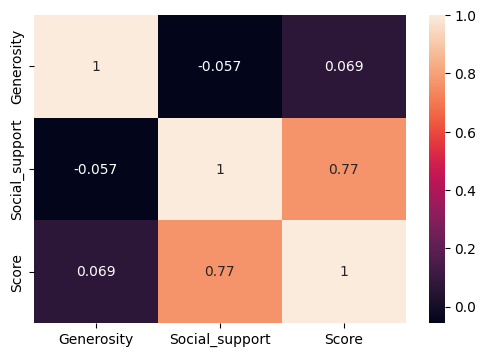

In [20]:
# 상관분석 : 2020년 데이터
a1 = x1.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(a1, annot=True)
plt.show()

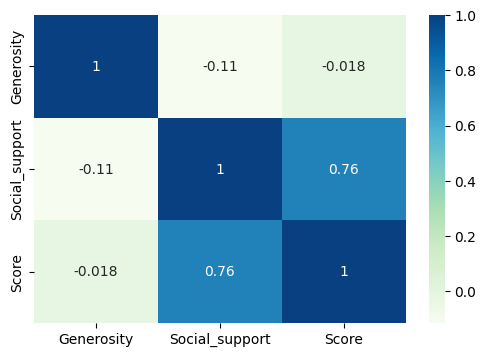

In [21]:
# 상관분석 : 2021년 데이터
a2 = x2.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(a2, annot=True, cmap='GnBu')
plt.show()

<br>

##### **결과 및 시사점**
+ 행복지수와 사회적 지지 간 관계는?
  + 상관계수는 2020년 0.77, 2021년 0.76으로, 강한 양의 상관관계로 나타남
  + 사회적 지지는 가족, 친구, 지인 등과 함께하는 관계에서 느끼는 정서적 지원에 대한 인식을 의미함
  + 일상 생활에서 가깝게 지내는 사람들과의 관계에서 형성되므로, 사회적 지지는 행복 수준에 중요한 요소임을 알 수 있음

<br>

+ 행복지수와 기부 문화 간 관계는?
  + 상관계수는 2020년 0.069, 2021년 -0.018로, 상관관계가 거의 없는 것으로 나타남
  + 따라서 기부 문화가 행복 수준과 직접적인 관련이 거의 없음을 확인할 수 있음

<br>

In [22]:
## (2-3) 행복 점수와 전체 변수의 상관관계

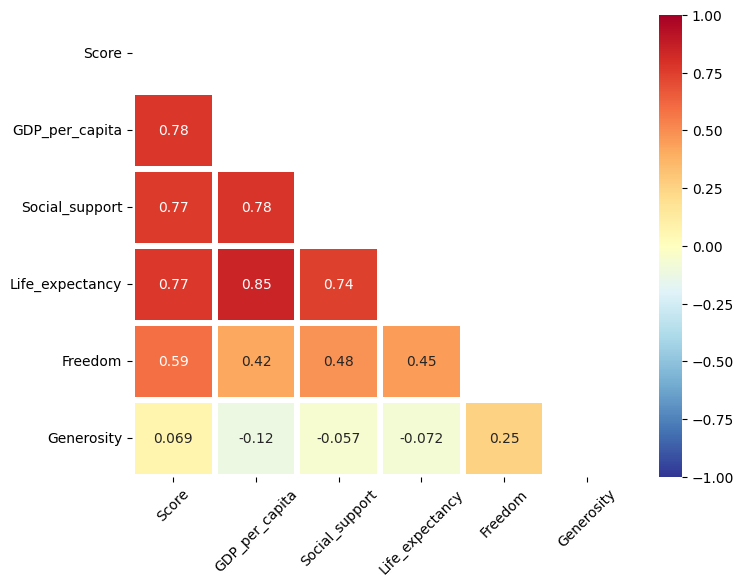

In [23]:
# 상관분석 : 2020년 데이터
corr = df2020.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
upp_mat = np.triu(corr)
sns.heatmap(corr, mask=upp_mat,vmin=-1, vmax=1, annot=True, cmap ='RdYlBu_r', linewidths=4)
plt.xticks(rotation=45)
plt.show()

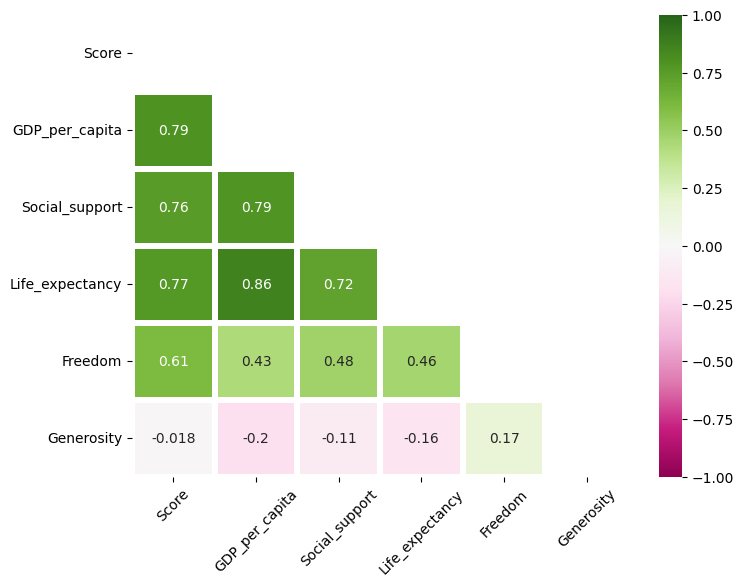

In [24]:
# 상관분석 : 2021년 데이터
corr = df2021.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
upp_mat = np.triu(corr)
sns.heatmap(corr, mask=upp_mat, vmin=-1, vmax=1,annot = True, cmap ='PiYG', linewidths=4)
plt.xticks(rotation=45)
plt.show()

<br>

##### **결과 및 시사점**
+ 2021년 행복지수에 가장 큰 영향을 미치는 요인은 경제적 여유(GDP, 0.79), 건강(0.77), 사회적 지지(0.76), 선택에 대한 자유도(0.61) 순으로 나타남
+ 기부 활동과 행복지수는 뚜렷한 관련이 없는 것으로 나타남
+ 1인당 GDP와 건강한 기대수명은 강한 양의 상관관계(0.86)가 있으므로, 경제적으로 여유로운 사람들이 더 건강하게 사는 경향이 있음을 알 수 있음

<br>

<br>

## 8.2. 단순선형 회귀분석
+ 회귀(regression)
  + 지도학습의 한 종류로, 정답(label)이 수치형 변수일 때 사용됨
  + 하나 이상의 독립변수(x)가 종속변수(y)에 미치는 영향력의 크기를 수학적 관계식(모델)으로 추정하는 통계 기법
    + 독립변수(independent variable) : 다른 변수의 변화를 야기하는 변수
    + 종속변수(dependent variable) : 다른 변수의 영향으로 변화하는 변수
  + 학습된 모델은 새로운 독립변수 값에 대해 종속변수의 값을 예측할 수 있음
  + 독립변수 개수에 따른 구분
    + 단순선형 회귀(simple linear regression) : 독립변수가 1개인 경우
    + 다중선형 회귀(multiple linear regression) : 독립변수가 2개 이상인 경우

<br>

+ 회귀모델 평가지표
|지표|설명|
|:---------|:------------------------------|
|MSE(Mean Squared Error)|- 평균제곱오차로, 작을수록 좋음|
|RMSE(Root Mean Squared Error)|- MSE의 양의 제곱근으로, 작을수록 좋음<br> -단위가 데이터와 동일하여 해석이 용이함|
|MAE(Mean Absolute Error)|- 평균절대오차로, 작을수록 좋음 <br>- 이상값에 덜 민감함|
|$R^2$ (결정계수)|- 모델이 데이터의 변동을 얼마나 잘 설명하는지 나타내는 지표 <br>- 0~1 사이의 값을 가지며, 1에 가까울수록 모델의 설명력이 높음|

<br>

+ 단순선형 회귀분석
  + 하나의 독립변수가 종속변수에 미치는 영향을 분석하는 통계 기법
    + 예 : 공부 시간(독립변수)에 따른 시험 성적(종속변수)의 변화
  + 단순선형 회귀모델
      $$y = \beta_0 + \beta_1x + \epsilon$$
    + $\beta_0$ : 절편(intercept)
    + $\beta_1$ : 기울기(slope)
    + $\epsilon$ : 오차(error)
  + 회귀분석의 목적은 주어진 데이터를 가장 잘 설명하는 회귀선을 찾는 것
    + 일반적으로 오차의 제곱합을 최소화하는 최소제곱추정법(OLS; Ordinary Least Squares)을 사용함
    $$\hat{y} = b_0 + b_1x$$
  + 잔차(residual) : 관측값과 예측값의 차이, $y-\hat{y}$

<br>

![](./images/fig3-8.jpg)

<br>

In [25]:
# 한글 깨짐 현상에 대한 해결 방법
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

In [26]:
# scikit-learn 설치하기
#!pip install scikit-learn

In [27]:
# scikit-learn의 linear_model 모듈에서 LinearRegression 클래스 불러오기
from sklearn.linear_model import LinearRegression

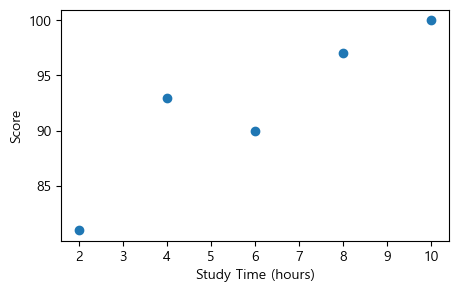

[94.3]


In [28]:
## 공부 시간(독립변수)에 따른 시험 성적(종속변수)의 변화
# 데이터프레임 생성
data = pd.DataFrame({
    'study_time': [2, 4, 6, 8, 10],
    'score': [81, 93, 90, 97, 100]
})

# 산점도 : 두 변수 간 상관관계 확인
plt.figure(figsize=(5, 3))
plt.scatter(data['study_time'], data['score'])
plt.xlabel('Study Time (hours)')
plt.ylabel('Score')
plt.show()

# 독립변수, 종속변수 분리
# scikit-Learn에서 입력 데이터(feature)를 2차원 배열로 요구함
X = data[['study_time']]
y = data['score']

# 선형 회귀모형 객체 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 7시간 공부했을 때, 시험 점수 예측
newdata = pd.DataFrame({'study_time': [7]})
predicted_score = model.predict(newdata)
print(predicted_score)

<br>

## 8.3. (실습) 날씨 데이터 분석
+ \[데이터\] 기상자료개방포털에서 제공하는 서울특별시의 기상 관측 데이터
  + 2010년 1월 ~ 2020년 12월
  + 날짜, 지점, 평균기온(℃), 최저기온(℃), 최고기온(℃)
  + \[실습파일\] [(2010-2020)_weather.csv](./data/(2010-2020)_weather.csv)

<br>

> **2021년 8월 15일의 평균기온을 예측하면?**

<br>

In [29]:
## (1) 데이터 확인 및 전처리

In [30]:
# 데이터 불러오기
seoul = pd.read_csv('./data/(2010-2020)_weather.csv', encoding='cp949')
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [31]:
# 데이터 정보
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       4018 non-null   object 
 1   지점       4018 non-null   int64  
 2   평균기온(℃)  4018 non-null   float64
 3   최저기온(℃)  4018 non-null   float64
 4   최고기온(℃)  4017 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 157.1+ KB


In [32]:
# 데이터 전처리 : 열 삭제
seoul.drop('지점', axis=1, inplace=True)

In [33]:
# 데이터 전처리 : 열 이름 변경
seoul.columns = ['날짜', '평균기온', '최저기온', '최고기온']

In [34]:
# 데이터 전처리 : 결측값 확인
seoul.isna().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [35]:
# 데이터 전처리 : 결측값이 포함된 행 삭제
seoul.dropna(axis=0, inplace=True)

In [36]:
# 데이터 전처리 : 날짜 변수를 datetime 형식으로 변환
seoul['날짜'] = pd.to_datetime(seoul['날짜'])

In [37]:
# 데이터 전처리 : 새로운 변수(연도, 월, 일) 생성
seoul['연도'] = seoul['날짜'].dt.year
seoul['월']=seoul['날짜'].dt.month
seoul['일']=seoul['날짜'].dt.day
seoul.head()

,날짜,평균기온,최저기온,최고기온,연도,월,일
0,2010-01-01,-7.6,-12.7,-3.6,2010,1,1
1,2010-01-02,-3.6,-7.4,0.2,2010,1,2
2,2010-01-03,-6.8,-10.5,-3.2,2010,1,3
3,2010-01-04,-5.9,-8.0,-3.4,2010,1,4
4,2010-01-05,-9.9,-12.3,-7.0,2010,1,5


In [38]:
# 데이터 전처리 : 8월 15일 데이터 선택
conditions = (seoul['월']==8) & (seoul['일']==15)
seoul0815 = seoul[conditions]
seoul0815

,날짜,평균기온,최저기온,최고기온,연도,월,일
226,2010-08-15,26.6,24.6,30.2,2010,8,15
591,2011-08-15,24.5,22.9,26.9,2011,8,15
957,2012-08-15,23.7,22.4,27.1,2012,8,15
1322,2013-08-15,28.7,25.8,32.4,2013,8,15
1687,2014-08-15,24.9,20.9,29.6,2014,8,15
2052,2015-08-15,27.1,23.1,30.8,2015,8,15
2418,2016-08-15,29.1,25.8,34.0,2016,8,15
2783,2017-08-15,21.9,20.8,24.0,2017,8,15
3148,2018-08-15,31.7,28.3,38.0,2018,8,15
3513,2019-08-15,25.9,23.9,28.6,2019,8,15


<br>

In [39]:
## (2) 데이터 분석 및 시각화

In [40]:
# 요약 통계량
seoul.describe()

,날짜,평균기온,최저기온,최고기온,연도,월,일
count,4017,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000
mean,2015-07-02 07:01:34.100074752,12.965596,8.991063,17.699627,2015.000249,6.521782,15.731392
min,2010-01-01 00:00:00,-14.800000,-18.000000,-10.700000,2010.000000,1.000000,1.000000
25%,2012-10-01 00:00:00,3.700000,-0.300000,8.200000,2012.000000,4.000000,8.000000
50%,2015-07-02 00:00:00,14.300000,9.800000,19.600000,2015.000000,7.000000,16.000000
75%,2018-04-02 00:00:00,22.800000,18.900000,27.400000,2018.000000,10.000000,23.000000
max,2020-12-31 00:00:00,33.700000,30.300000,39.600000,2020.000000,12.000000,31.000000
std,NaN,10.805008,10.934039,10.976719,3.163104,3.449203,8.802435


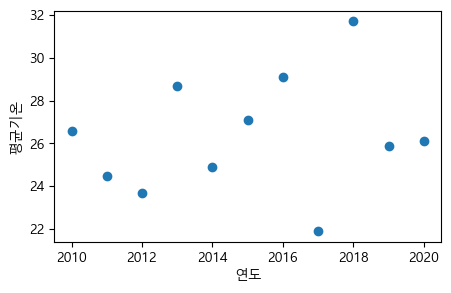

In [41]:
# 산점도 : 연도에 따른 평균기온 변화
# 독립변수, 종속변수 분리
# scikit-learn에서 입력 데이터(feature)를 2차원 배열로 요구함
X = seoul0815[['연도']]
y = seoul0815['평균기온']

fig = plt.figure(figsize=(5, 3))
plt.scatter(X, y)
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.show()

In [42]:
# 상관계수 : 연도와 평균기온의 상관관계
# 연도와 평균기온은 약한 양의 상관관계로 나타나, 단순선형 회귀모형을 적합할 수 있음
seoul0815[['연도', '평균기온']].corr()

,연도,평균기온
연도,1.000000,0.194953
평균기온,0.194953,1.000000


In [43]:
# 단순선형 회귀분석 : 2021년 8월 15일 평균기온 예측
# 선형 회귀모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀식의 절편 및 기울기
intercept = model.intercept_
slope = model.coef_
print(f'회귀식: hat(y) = {model.intercept_:.2f} + {model.coef_[0]:.2f}*x')

# 결정계수
R2 = model.score(X, y)
print(f'결정계수 : {R2:.3f}')

# 2021년일 때, 평균기온 예측
newdata = pd.DataFrame({'연도': [2022]})
y_pred = model.predict(newdata)
print(f'2021년 8월 15일 평균기온 예측값 : {y_pred[0]:.2f}')

회귀식: hat(y) = -297.85 + 0.16*x
결정계수 : 0.038
2021년 8월 15일 평균기온 예측값 : 27.51


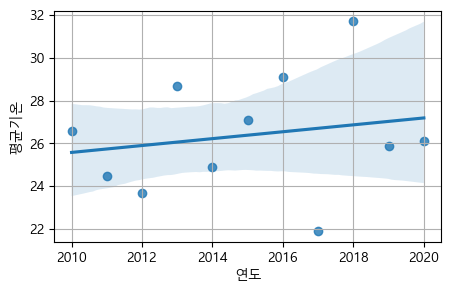

In [44]:
# 산점도와 단순선형 회귀선
fig = plt.figure(figsize=(5, 3))   
sns.regplot(x='연도', y='평균기온', data=seoul0815)
plt.grid()
plt.show()

<br>

##### **결과 및 시사점**
+ 연도와 평균기온은 약한 양의 상관관계(r=0.195)로 나타나, 단순선형 회귀모형을 적합할 수 있음
+ 독립변수는 연도, 종속변수는 평균기온으로 단순선형 회귀분석을 실시한 결과, 모형의 설명력은 3.8%로 비교적 낮게 나타남
+ 적합된 회귀식 : $\hat{y} = -297.85 + 0.16*x$
  + 연도가 1년 증가할수록 8월 15일의 평균기온은 약 0.16℃ 상승하는 것으로 추정됨
+ 따라서 2021년 8월 15일의 평균기온은 27.51℃로 예측됨

<br>

<br>

## 8.4. 다중선형 회귀분석
+ 다중선형 회귀분석
  + 두 개 이상의 독립변수가 종속변수에 미치는 영향을 분석하는 통계 기법
    + 예: 공부 시간, 수면 시간, 강의 출석률(독립변수들)에 따른 시험 성적(종속변수)의 변화
  + 다중선형 회귀모델
    $$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_p x_p + \epsilon$$
    + $\beta_0$ : 절편(intercept)  
    + $\beta_1, \beta_2, \dots, \beta_p$ : 각 독립변수의 기울기(slope)
    + $\epsilon$ : 오차(error)

<br>

## 8.5. (실습) 캘리포니아 주택 가격 분석
+ \[데이터\] scikit-learn에서 제공하는 캘리포니아 주택 가격 데이터
  + 1990년대 캘리포니아 지역의 주택 가격에 대한 데이터
  + 총 20,640개의 관측값과 8개의 독립변수(feature), 1개의 종속변수(target)으로 구성됨
  + `as_frame=True` 옵션을 사용하면 독립변수와 종속변수를 DataFrame 형태로 불러올 수 있음
  + `as_frame=False` 옵션(기본값)을 사용하면 독립변수와 종속변수를 각각 넘파이 배열 형태로 별도로 제공함

<br>

|변수|설명|
|:------|:------------------------------|
|MedInc|지역 중위 소득 (10,000 USD)|
|HouseAge|주택 연식 (건축 후 경과된 연도 수)|
|AveRooms|가구당 평균 방 개수|
|AveBedrms|가구당 평균 침실 개수|
|Population|지역 내 인구 수|
|AveOccup|가구당 평균 거주 인원 수|
|Latitude|위도|
|Longitude|경도|
|MedHouseVal|주택 중위 가격 (100,000 USD)|

<br>

In [45]:
## (1) 데이터 확인 및 전처리

In [46]:
# 데이터 불러오기
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [47]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [48]:
# 데이터 전처리 : 결측값 확인
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [49]:
# 데이터 전처리 : 훈련 데이터와 평가 데이터로 분할 (7:3 비율)
california = fetch_california_housing()
X = california.data
y = california.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<br>

In [50]:
## (2) 데이터 분석 및 시각화

In [51]:
# 요약 통계량 확인
df_train = pd.DataFrame(data=X_train, columns=california.feature_names)
df_train['MedHouseVal'] = y_train
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


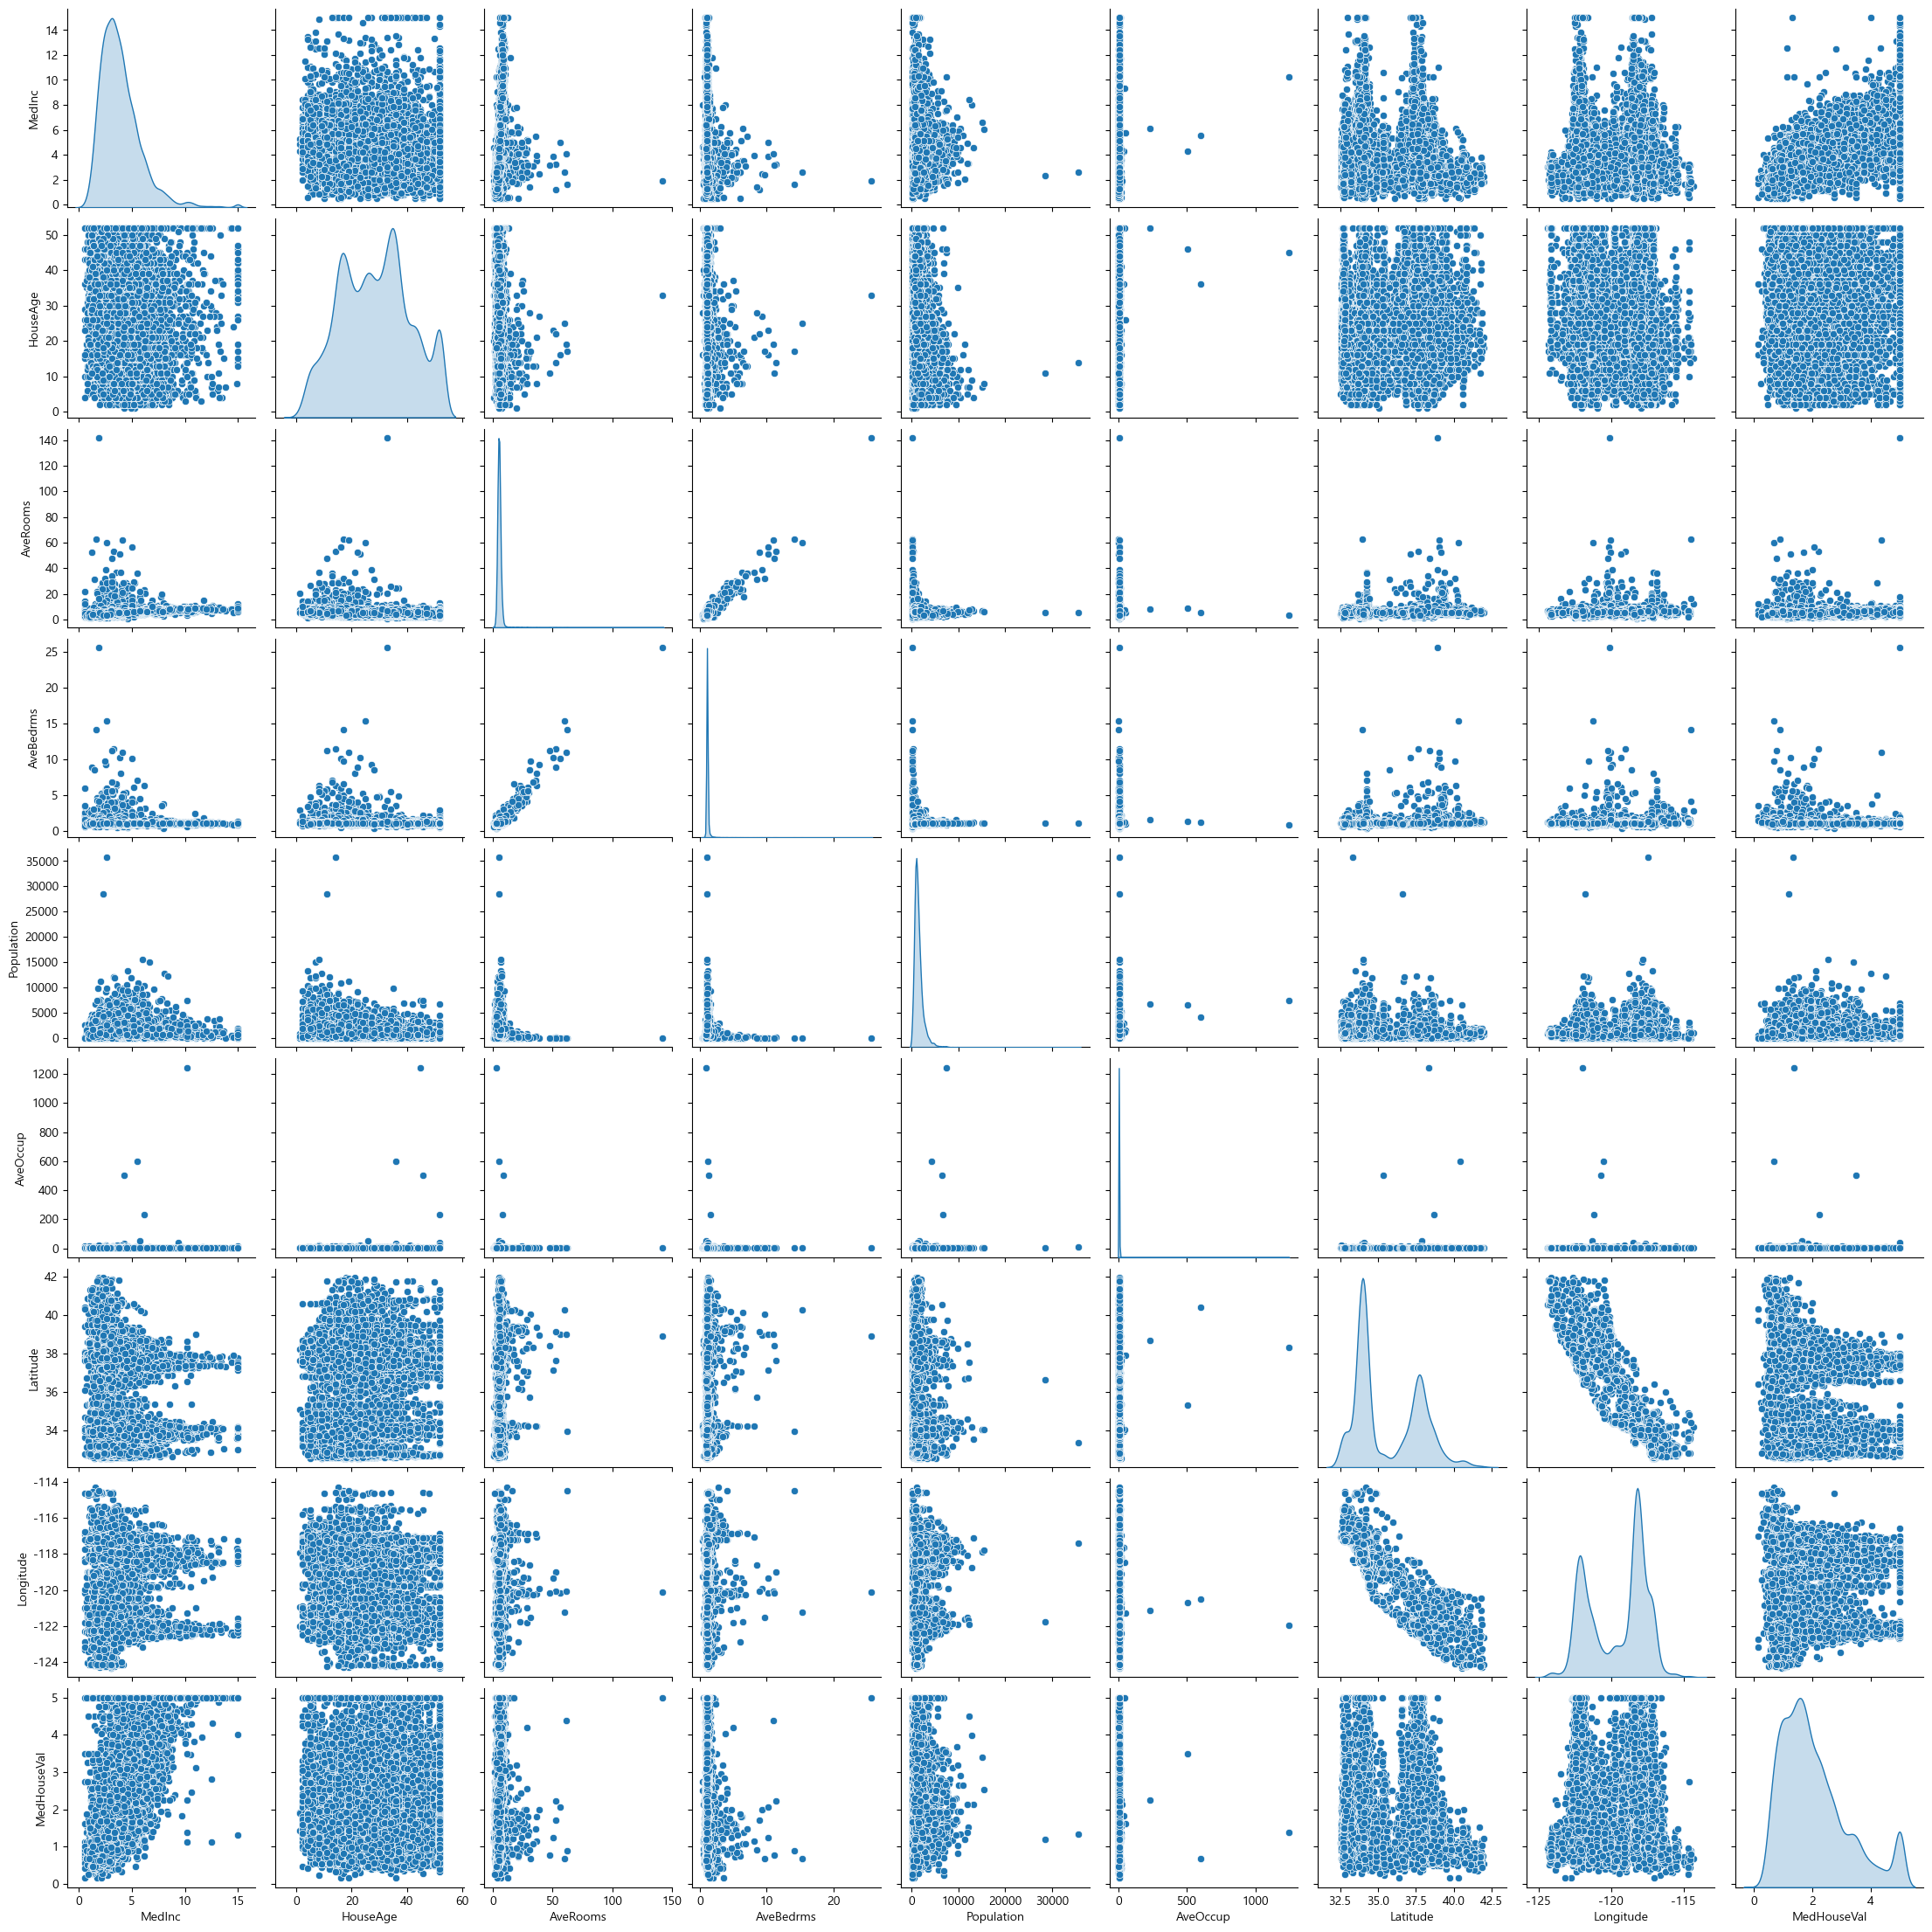

In [52]:
# 산점도
sns.pairplot(df_train, diag_kind='kde')
plt.show()

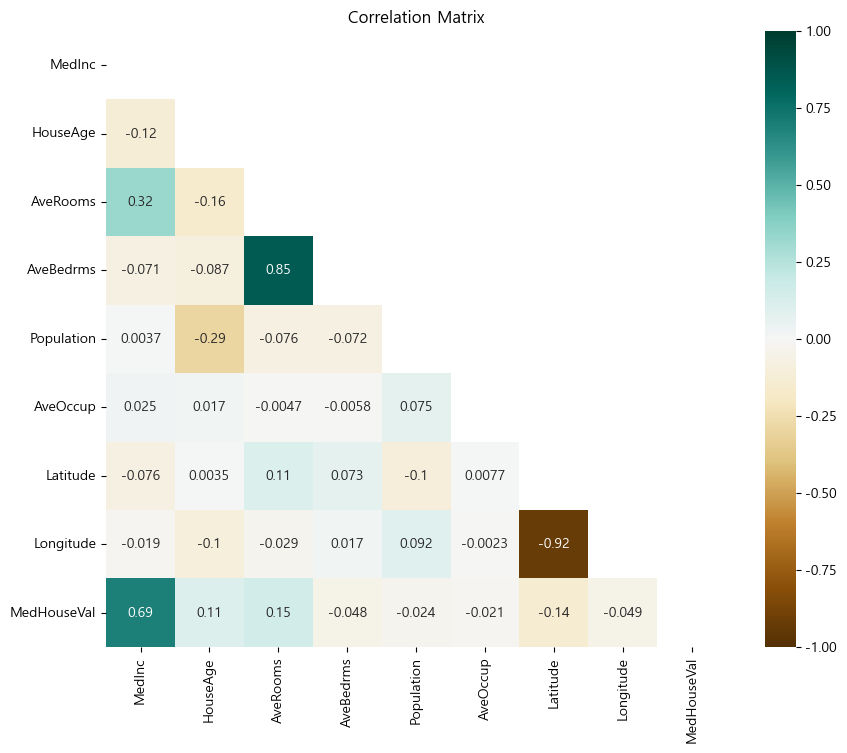

In [53]:
# 상관분석
corr_train = df_train.corr()
upp_mat = np.triu(corr_train)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_train, annot=True, mask=upp_mat, cmap='BrBG', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [54]:
# 상관관계가 강한 독립변수 선택
# scikit-learn에서 입력 데이터(feature)를 2차원 배열로 요구함
features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
target = 'MedHouseVal'

X_train = df_train[features]
y_train = df_train[target]

In [55]:
# 평가 데이터에서도 훈련 데이터에서 사용한 독립변수만 선택
df_test = pd.DataFrame(data=X_test, columns=california.feature_names)
df_test['MedHouseVal'] = y_test
X_test = df_test[features]

In [56]:
# 선형 회귀모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀모델 평가 : 결정계수, MSE
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"결정계수 : {R2:.3f}")
print(f"RMSE : {RMSE:.3f}")

결정계수 : 0.520
RMSE : 0.794


In [57]:
# 회귀계수
df_coef = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(df_coef)

    Feature  Coefficient
0    MedInc     0.435658
1  HouseAge     0.016937
2  AveRooms    -0.019505
3  Latitude    -0.045071


In [58]:
# statsmodels 라이브러리 설치
#!pip install statsmodels

In [59]:
# [참고] 회귀계수의 유의성
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3890.
Date:                Thu, 24 Jul 2025   Prob (F-statistic):               0.00
Time:                        02:28:44   Log-Likelihood:                -17332.
No. Observations:               14448   AIC:                         3.467e+04
Df Residuals:                   14443   BIC:                         3.471e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6091      0.115     13.957      0.0

<br>

##### **결과 및 시사점**
+ 결정계수 $R^2$은 52.0%로 나타남
+ RMSE는 0.630으로, 주택 중위 가격의 실제값과 예측값이 평균적으로 약 6만 달러 차이가 있다는 것을 의미함
+ 훈련 데이터에서 주택 중위 가격의 평균은 약 20만 달러인 점을 고려하면, 모델의 평균 오차는 약 30% 수준임을 알 수 있음
+ 따라서 평균 오차가 비교적 큰 편이므로, 모델 성능 개선이 필요한 것으로 판단됨
+ 회귀계수를 살펴보면 지역 중위 소득, 주택 연식이 증가할수록 주택 중위 가격은 높아지며, 가구당 평균 거주 인원 수, 위도가 증가할수록 주택 중위가격은 낮아지는 것으로 나타남